# Machine Learning
The "Machine learning" file performs data analysis on heart disease risk using various machine learning algorithms. The data is loaded from the "heart_disease_risk.csv" file and split into features and the target variable. Subsequently, the data is standardized, and performance metrics are measured for each model. This analysis provides significant insights into predicting heart disease risk using different machine learning algorithms.

### Required libraries

In [1]:
import pandas as pd
import xgboost as xgb

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from main import balance_data_smote, balance_data_smotetomek, display_confusion_matrix, display_results, export_sav_model, generate_results, save_results_to_xlsx, test_sav_model, train_model, train_model_cross_val,  train_model_loo, train_model_bootstrapping, train_model_avg_bootstrapping

/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/skl2onnx/algebra/onnx_ops.py:159: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  tys = obj.typeStr or ''
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/skl2onnx/algebra/automation.py:154: UserWarning: OpSchema.FormalParameter.isHomogeneous is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.is_homogeneous instead.
  if getattr(obj, 'isHomogeneous', False):
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/jinja2/environment.py:485: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  return getattr(obj, attribute)


### Loading data

In [2]:
data = pd.read_csv('heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Data Split: Features and Target

In [3]:
X = data.drop('decision', axis=1)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 13) (90, 13) (207,) (90,)


### Standardization of Data

In [4]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Data Balancing

In [5]:
X_train, y_train = balance_data_smote(X_train, y_train)
# X_train, y_train = balance_data_smotetomek(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(228, 13)
(228,)


### Logistic Regression

Accuracy: 0.87
ROC AUC Score: 0.87
G-Mean: 0.74
F1 Score: 0.85
Sensitivity: 0.8
Specificity: 0.93
Precision: 0.92
AVG: 0.82


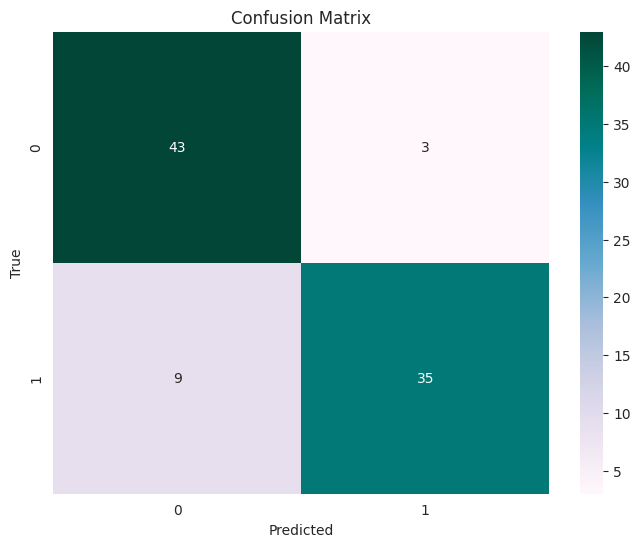

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
model = LogisticRegression(solver='liblinear')

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Logistic Regression', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/logistic_regression')
result = test_sav_model("Sav_models/logistic_regression", "test_data")
print(result)

### Ridge

Accuracy: 0.86
ROC AUC Score: 0.85
G-Mean: 0.73
F1 Score: 0.85
Sensitivity: 0.82
Specificity: 0.89
Precision: 0.88
AVG: 0.81


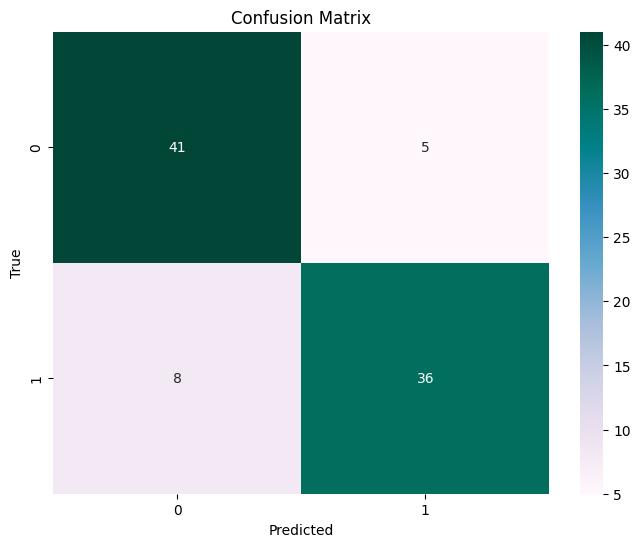

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(


In [15]:
model = RidgeClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Ridge', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/ridge')
result = test_sav_model("Sav_models/ridge", "test_data")
print(result)

### Naive Bayes

Accuracy: 0.87
ROC AUC Score: 0.87
G-Mean: 0.75
F1 Score: 0.86
Sensitivity: 0.82
Specificity: 0.91
Precision: 0.9
AVG: 0.82


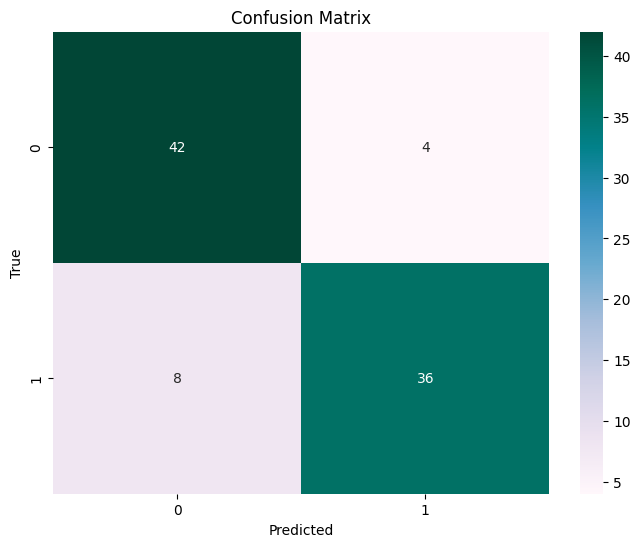

Model exported successfully.
[1 1 1 1 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [10]:
model = GaussianNB()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Naive Bayes', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/naive_bayes')
result = test_sav_model("Sav_models/naive_bayes", "test_data")
print(result)

### Support Vector Machine

Accuracy: 0.84
ROC AUC Score: 0.84
G-Mean: 0.7
F1 Score: 0.82
Sensitivity: 0.75
Specificity: 0.93
Precision: 0.92
AVG: 0.79


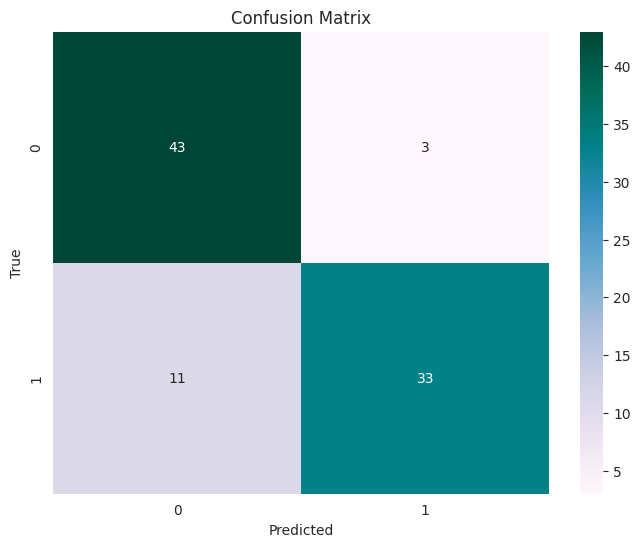

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [22]:
model = SVC(kernel="linear")

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('results', [('SVM', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/svm')
result = test_sav_model("Sav_models/svm", "test_data")
print(result)

### Decision Tree

Accuracy: 0.73
ROC AUC Score: 0.73
G-Mean: 0.53
F1 Score: 0.71
Sensitivity: 0.68
Specificity: 0.78
Precision: 0.75
AVG: 0.66


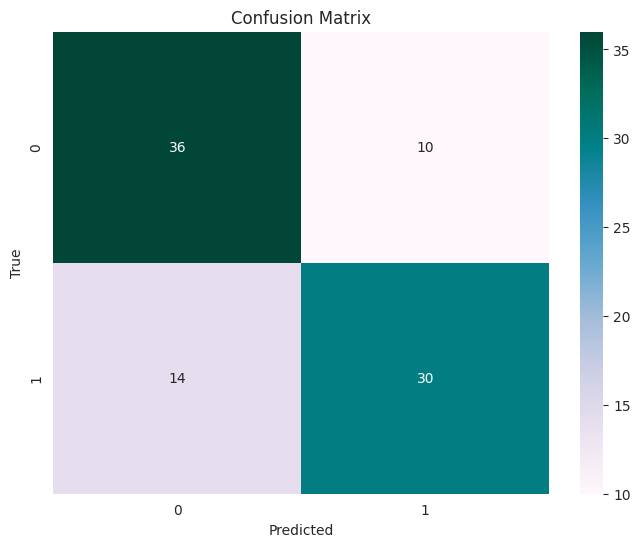

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
model = DecisionTreeClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Decision Tree', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/decision_tree')
result = test_sav_model("Sav_models/decision_tree", "test_data")
print(result)

### Random Forest

Accuracy: 0.8
ROC AUC Score: 0.8
G-Mean: 0.63
F1 Score: 0.78
Sensitivity: 0.73
Specificity: 0.87
Precision: 0.84
AVG: 0.74


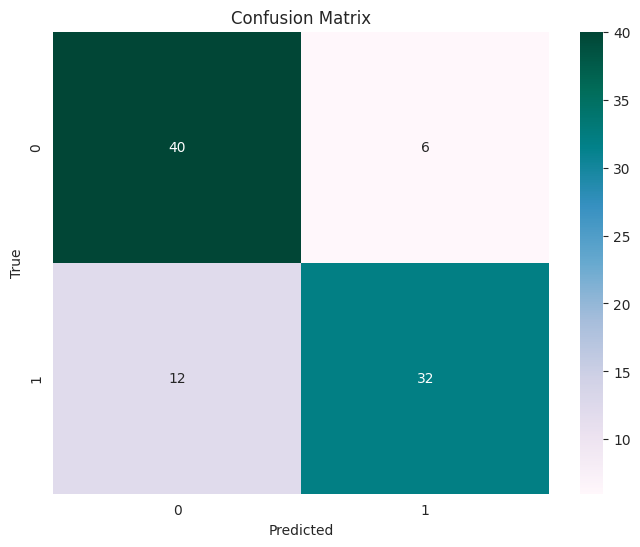

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
model = RandomForestClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Random Forest', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/random_forest')
result = test_sav_model("Sav_models/random_forest", "test_data")
print(result)

### Ada Boost

Accuracy: 0.81
ROC AUC Score: 0.81
G-Mean: 0.66
F1 Score: 0.81
Sensitivity: 0.82
Specificity: 0.8
Precision: 0.8
AVG: 0.76


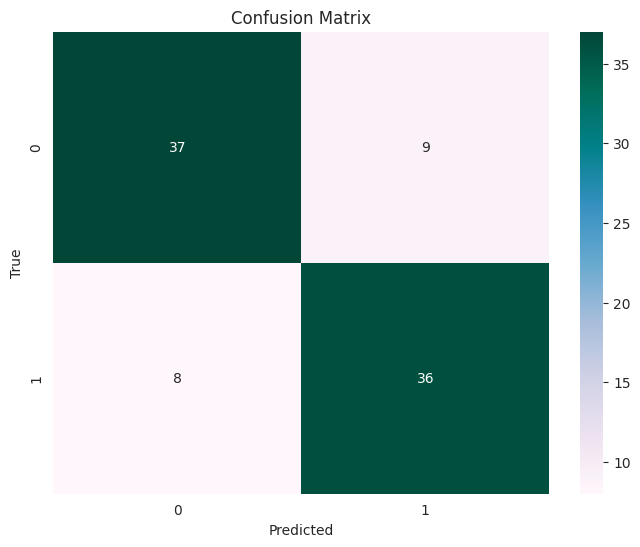

Model exported successfully.
[0 1 1 1 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [25]:
model = AdaBoostClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Ada Boost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/ada_boost')
result = test_sav_model("Sav_models/ada_boost", "test_data")
print(result)

### Extreme Gradient Boosting (XGBoost)

Accuracy: 0.78
ROC AUC Score: 0.78
G-Mean: 0.6
F1 Score: 0.76
Sensitivity: 0.73
Specificity: 0.83
Precision: 0.8
AVG: 0.71


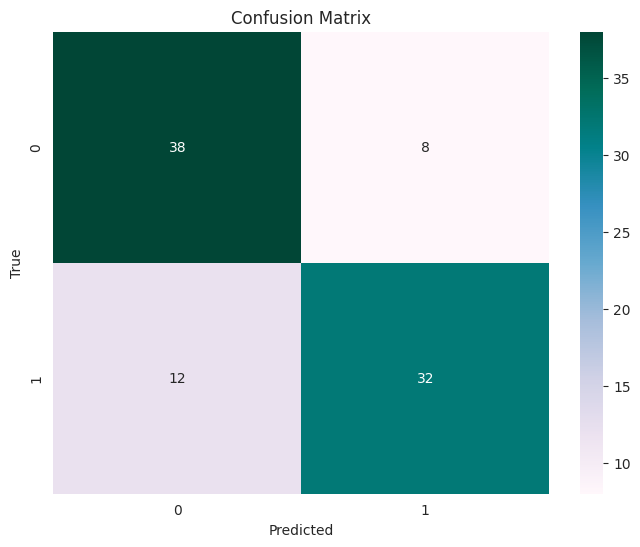

Model exported successfully.
[0 1 1 0 0]


In [13]:
model = xgb.XGBClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=100, test_size=0.3)
save_results_to_xlsx('results', [('XGBoost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/xgboost')
result = test_sav_model("Sav_models/xgboost", "test_data")
print(result)

### Stochastic Gradient Boosting (SGBoost)

Accuracy: 0.81
ROC AUC Score: 0.81
G-Mean: 0.66
F1 Score: 0.8
Sensitivity: 0.8
Specificity: 0.83
Precision: 0.81
AVG: 0.76


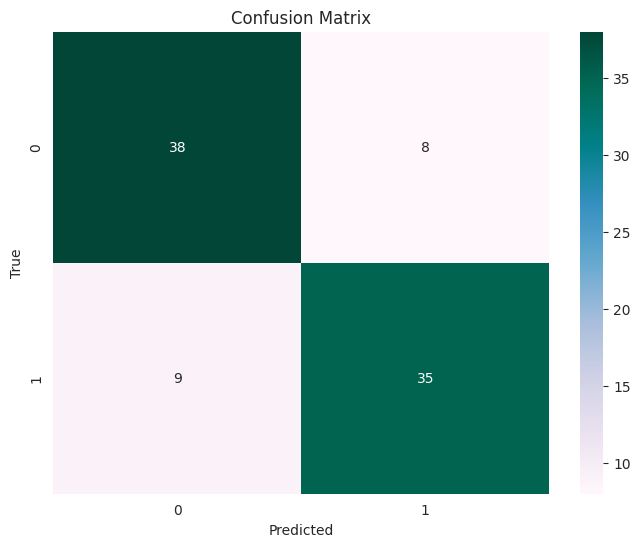

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [27]:
model = HistGradientBoostingClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('SGBoost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/sgboost')
result = test_sav_model("Sav_models/sgboost", "test_data")
print(result)

### Linear Discriminant Analysis (LDA)

Accuracy: 0.86
ROC AUC Score: 0.85
G-Mean: 0.73
F1 Score: 0.85
Sensitivity: 0.82
Specificity: 0.89
Precision: 0.88
AVG: 0.81


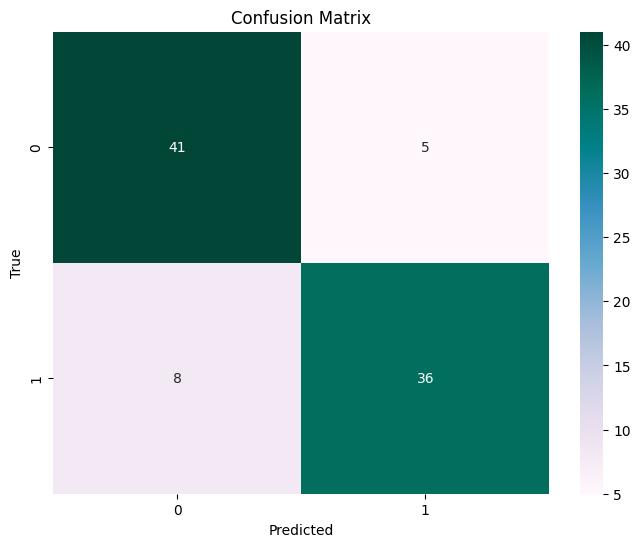

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [21]:
model = LinearDiscriminantAnalysis()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Linear Discriminant', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/linear_discriminant')
result = test_sav_model("Sav_models/linear_discriminant", "test_data")
print(result)

### Quadratic Discriminant Analysis (QDA)

Accuracy: 0.78
ROC AUC Score: 0.78
G-Mean: 0.6
F1 Score: 0.78
Sensitivity: 0.82
Specificity: 0.74
Precision: 0.75
AVG: 0.72


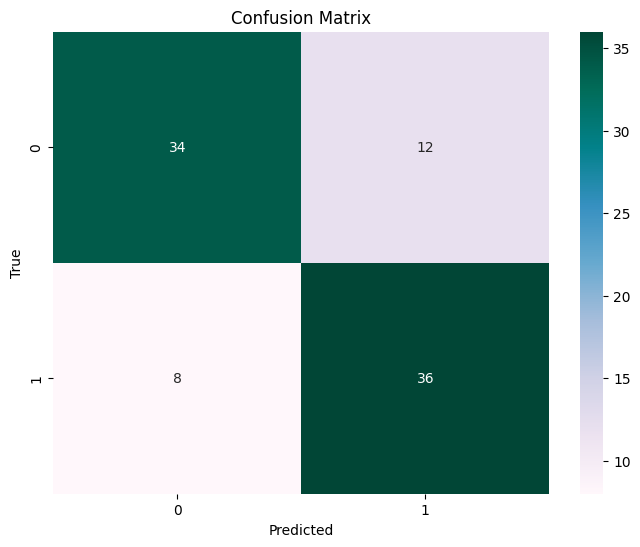

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [17]:
model = QuadraticDiscriminantAnalysis()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Quadratic Discriminant', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/quadratic_discriminant')
result = test_sav_model("Sav_models/quadratic_discriminant", "test_data")
print(result)

### Multi-layer Perceptron (Neural Network)

Accuracy: 0.79
ROC AUC Score: 0.79
G-Mean: 0.62
F1 Score: 0.8
Sensitivity: 0.86
Specificity: 0.72
Precision: 0.75
AVG: 0.74


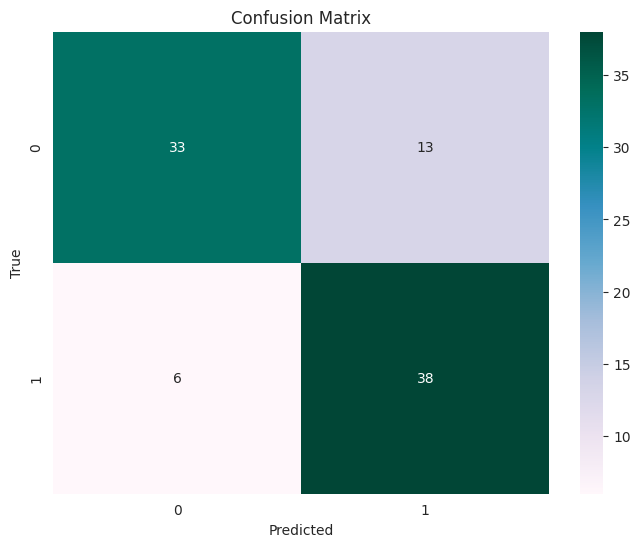

/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model exported successfully.
[1 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [6]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam')

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('results', [('Neural Network', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/neural_network')
result = test_sav_model("Sav_models/neural_network", "test_data")
print(result)

### KNN

Accuracy: 0.62
ROC AUC Score: 0.62
G-Mean: 0.38
F1 Score: 0.6
Sensitivity: 0.57
Specificity: 0.67
Precision: 0.62
AVG: 0.53


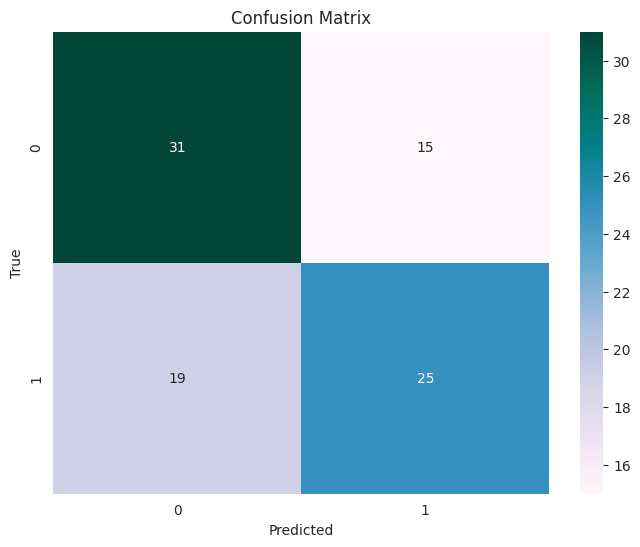

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [7]:
model = KNeighborsClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('KNN', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/knn')
result = test_sav_model("Sav_models/knn", "test_data")
print(result)

### Nearest Centroid

Accuracy: 0.61
ROC AUC Score: 0.61
G-Mean: 0.36
F1 Score: 0.57
Sensitivity: 0.52
Specificity: 0.7
Precision: 0.62
AVG: 0.51


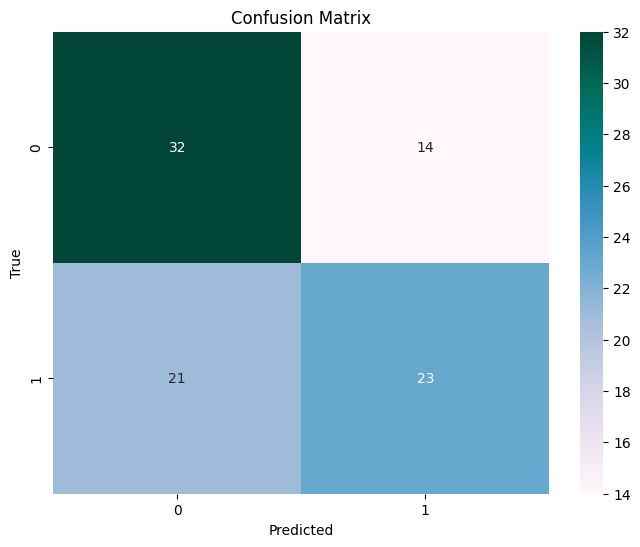

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(


In [23]:
model = NearestCentroid()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Nearest Centroid', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/nearest_centroid')
result = test_sav_model("Sav_models/nearest_centroid", "test_data")
print(result)

### Gradient Boosting

Accuracy: 0.8
ROC AUC Score: 0.8
G-Mean: 0.64
F1 Score: 0.79
Sensitivity: 0.77
Specificity: 0.83
Precision: 0.81
AVG: 0.74


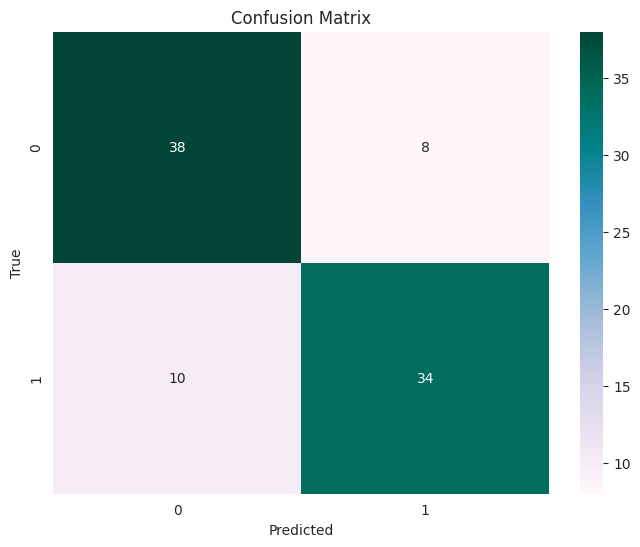

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [8]:
model = GradientBoostingClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Gradient Boosting', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/gradient_boosting')
result = test_sav_model("Sav_models/gradient_boosting", "test_data")
print(result)

### Cat Boost

Learning rate set to 0.00548
0:	learn: 0.6891558	total: 51.4ms	remaining: 51.4s
1:	learn: 0.6840363	total: 52.4ms	remaining: 26.1s
2:	learn: 0.6789650	total: 53.2ms	remaining: 17.7s
3:	learn: 0.6742305	total: 54ms	remaining: 13.4s
4:	learn: 0.6698081	total: 54.9ms	remaining: 10.9s
5:	learn: 0.6653785	total: 55.7ms	remaining: 9.23s
6:	learn: 0.6606275	total: 56.6ms	remaining: 8.03s
7:	learn: 0.6563015	total: 57.4ms	remaining: 7.12s
8:	learn: 0.6530988	total: 58.2ms	remaining: 6.41s
9:	learn: 0.6484347	total: 59.2ms	remaining: 5.86s
10:	learn: 0.6440992	total: 60ms	remaining: 5.4s
11:	learn: 0.6402134	total: 61ms	remaining: 5.02s
12:	learn: 0.6371062	total: 61.8ms	remaining: 4.69s
13:	learn: 0.6329702	total: 62.5ms	remaining: 4.4s
14:	learn: 0.6290993	total: 63.2ms	remaining: 4.15s
15:	learn: 0.6257398	total: 64ms	remaining: 3.94s
16:	learn: 0.6219703	total: 64.8ms	remaining: 3.75s
17:	learn: 0.6184497	total: 65.6ms	remaining: 3.58s
18:	learn: 0.6147990	total: 66.5ms	remaining: 3.43s
19:

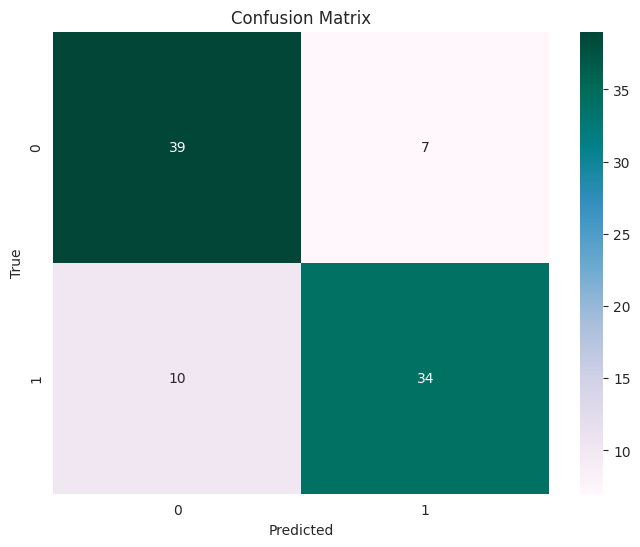

Learning rate set to 0.006135
0:	learn: 0.6879445	total: 908us	remaining: 907ms
1:	learn: 0.6815324	total: 1.64ms	remaining: 817ms
2:	learn: 0.6750696	total: 2.27ms	remaining: 756ms
3:	learn: 0.6704827	total: 2.95ms	remaining: 735ms
4:	learn: 0.6661826	total: 3.65ms	remaining: 726ms
5:	learn: 0.6600490	total: 4.3ms	remaining: 713ms
6:	learn: 0.6555289	total: 5.13ms	remaining: 728ms
7:	learn: 0.6493484	total: 5.8ms	remaining: 720ms
8:	learn: 0.6440399	total: 6.5ms	remaining: 716ms
9:	learn: 0.6396394	total: 7.26ms	remaining: 719ms
10:	learn: 0.6335513	total: 7.92ms	remaining: 713ms
11:	learn: 0.6277131	total: 8.63ms	remaining: 711ms
12:	learn: 0.6229094	total: 9.32ms	remaining: 708ms
13:	learn: 0.6175918	total: 10ms	remaining: 707ms
14:	learn: 0.6127393	total: 10.8ms	remaining: 706ms
15:	learn: 0.6084897	total: 11.4ms	remaining: 699ms
16:	learn: 0.6030696	total: 12.1ms	remaining: 701ms
17:	learn: 0.5986367	total: 12.8ms	remaining: 698ms
18:	learn: 0.5948289	total: 13.6ms	remaining: 703m

In [9]:
model = CatBoostClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('results', [('Cat Boost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/cat_boost')
result = test_sav_model("Sav_models/cat_boost", "test_data")
print(result)

### LGBM

[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

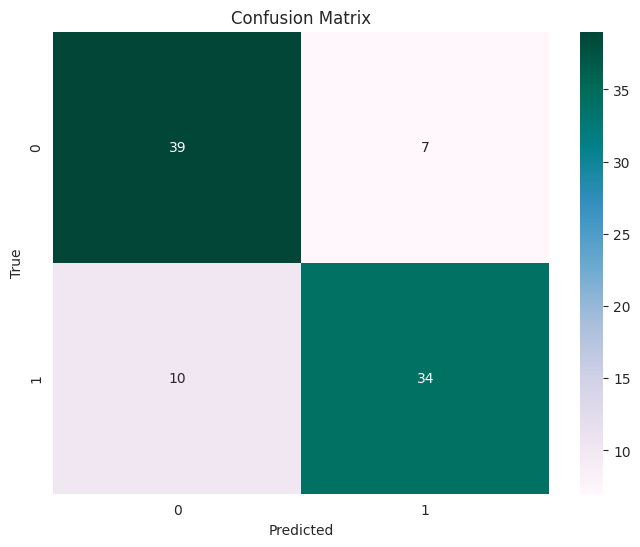

[LightGBM] [Info] Number of positive: 140, number of negative: 157
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 297, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471380 -> initscore=-0.114603
[LightGBM] [Info] Start training from score -0.114603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [10]:
model = LGBMClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('results', [('LGBM', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, 'Sav_models/lgbm')
result = test_sav_model("Sav_models/lgbm", "test_data")
print(result)